# Image Processing with Nearest Neighbors

## Load Digits Data

In [1]:
from sklearn.datasets import load_digits

digit = load_digits()

In [2]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [3]:
digit.target.shape

(1797,)

In [4]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digit.data.shape

(1797, 64)

In [6]:
digit.data.min(), digit.data.max()

(0.0, 16.0)

## Displaying Digits

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [8]:
def display_img(img, target, ax):
  img = img.reshape((8, 8))
  ax.imshow(img, cmap='gray')
  ax.set_title(f'Digit: {str(target)}')
  ax.grid(False)

##  display the first eight digits

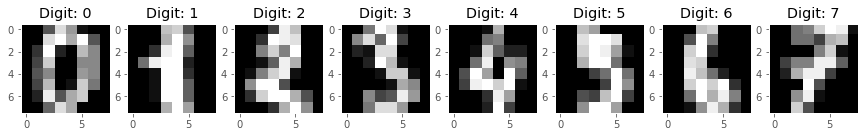

In [9]:
fig, axs = plt.subplots(1, 8, figsize=(15,8))
for i in range(8):
  display_img(digit['data'][i], digit['target'][i], axs[i])

fig.show()

## Digits Train/Test Split

In [10]:
from sklearn.model_selection import train_test_split

X, y = digit.data, digit.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1347, 64), (1347,), (450, 64), (450,))

## Image classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=11, metric='manhattan')
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score.round(3)

0.971

## Confusion matrix

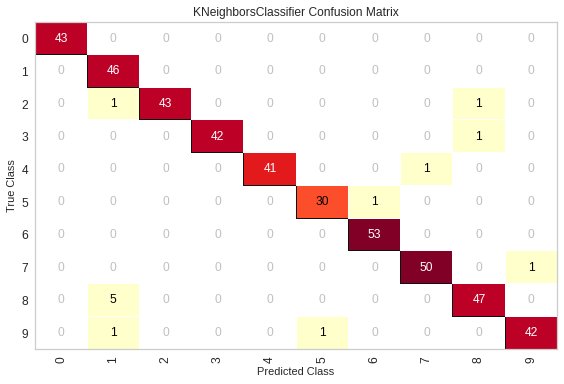

In [14]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(clf, classes=list(range(10)))
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [15]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred, labels=list(range(10)))

In [16]:
matrix

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 43,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  1],
       [ 0,  5,  0,  0,  0,  0,  0,  0, 47,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0, 42]])

## Picking a suitable metric

In [18]:
from sklearn.metrics.pairwise import (
    euclidean_distances,
    manhattan_distances,
    cosine_distances,
)

d0 = manhattan_distances([1. * digit.data[0], 2. * digit.data[0]])[0,1]
d1 = euclidean_distances([1. * digit.data[0], 2. * digit.data[0]])[0,1]
d2 = cosine_distances([1. * digit.data[0], 2. * digit.data[0]])[0,1]

d0, d1, d2

(294.0, 55.40758070878027, 0.0)

## Setting the correct K

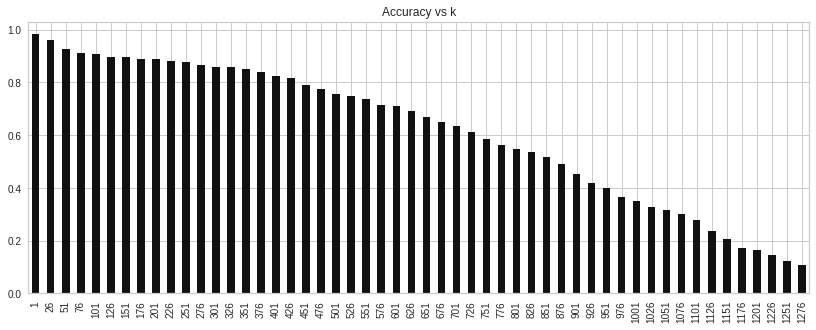

In [25]:
scores = {}

for k in range(1, 1301, 25):
  clf = KNeighborsClassifier(n_neighbors=k, metric='cosine')
  clf.fit(X_train, y_train)
  scores[k] = accuracy_score(y_test, clf.predict(X_test))

fig, ax = plt.subplots(1, 1, figsize=(14, 5))

pd.Series(scores).plot(
    title='Accuracy vs k',
    kind='bar',
    color='k',
    ax=ax
)

## Hyperparameter tuning using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'metric': ['cosine', 'manhattan', 'euclidean'],
    'n_neighbors': range(1, 22, 2)
}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, param_grid=params, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['cosine', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 22, 2)},
             scoring='accuracy')

In [27]:
search.best_params_

{'metric': 'cosine', 'n_neighbors': 3}

In [28]:
search.best_score_

0.9866473908853092

In [29]:
y_pred = search.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.98

# KNN Regressor

In [31]:
from sklearn.model_selection import train_test_split

X, y = digit['data'], digit['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
from sklearn.metrics import mean_squared_error

clf = KNeighborsClassifier(n_neighbors=3, metric='cosine')

clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print(
    'MNIST: Accuracy score = {:.1%} & MAE = {:.2}'.format(
        accuracy_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred)
    )
    
)

MNIST: Accuracy score = 99.3% & MAE = 0.12


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3, metric='euclidean')

reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test)
y_test_pred_int = y_test_pred.round(0).astype(int)

print(
    'MNIST: Accuracy score = {:.1%} & MAE = {:.2}'.format(
        accuracy_score(y_test, y_test_pred_int),
        mean_squared_error(y_test, y_test_pred)
    )
    
)

MNIST: Accuracy score = 97.3% & MAE = 0.18
